# Skewness

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [26]:
np.random.seed(10)

In [27]:
data=np.random.normal(0,1,100)
skew1=np.exp(data)
skew2=np.log(data)

C:\Users\rajal\AppData\Local\Temp\ipykernel_11732\2826835526.py:3: RuntimeWarning: invalid value encountered in log
  skew2=np.log(data)


In [28]:
df=pd.DataFrame({'Left':skew2,'Right':skew1})
df.head()

,Left,Right
0,0.286371,3.787047
1,-0.335083,2.044757
2,NaN,0.213227
3,NaN,0.991651
4,-0.475883,1.861413


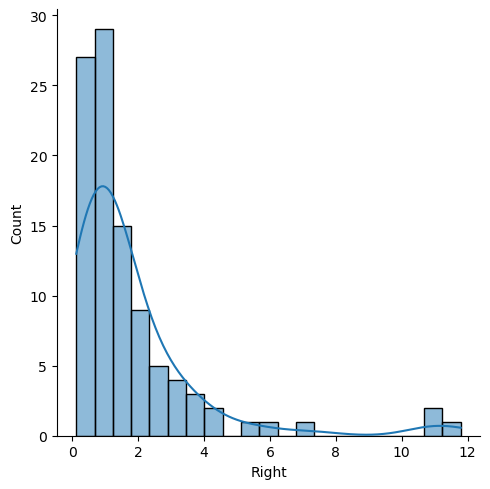

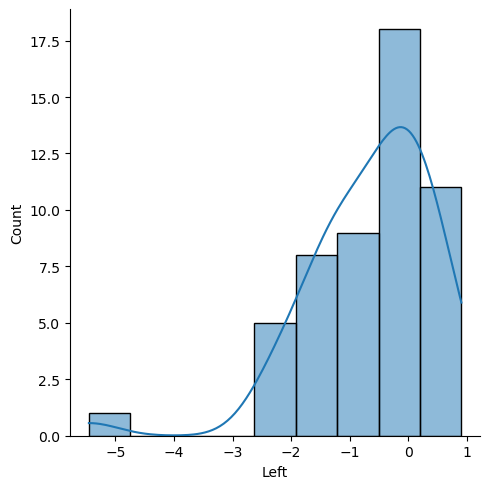

In [29]:
sns.displot(df['Right'],kde=True)
sns.displot(df['Left'],kde=True)
plt.show()

In [30]:
print(skew(df['Left'].dropna()))
print(skew(df['Right'].dropna()))

-1.6309262091194234
3.0750112814835258


## Treat skewness

### Negative skew data

C:\Users\rajal\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


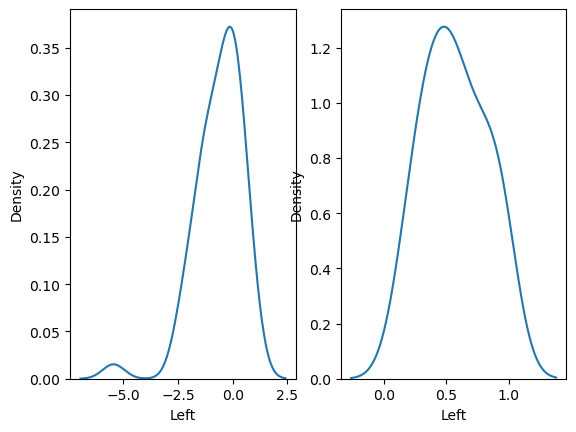

In [31]:
# Since Left Columns is negatively skew we use sqrt transformation
left=np.sqrt(df['Left'])
figure,ax=plt.subplots(1,2)
sns.kdeplot(df['Left'],ax=ax[0])
sns.kdeplot(left,ax=ax[1])
plt.show()

In [38]:
print("Before taking sqrt",skew(df['Left'].dropna()))
print("After taking sqrt",skew(left.dropna()))

Before taking sqrt -1.6309262091194234
After taking sqrt 0.11221070757904539


## Inference
- Since after taking sqrt the skewness of the column left become -0.23. So it is in the range of -0.5 to 0.5 then the data is fairly symmetrical

### Positively skew data

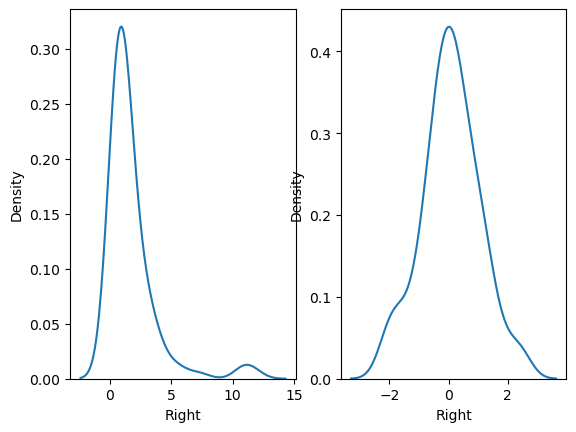

In [33]:
right=np.log(df['Right'])
figure,ax=plt.subplots(1,2)
sns.kdeplot(df['Right'],ax=ax[0])
sns.kdeplot(right,ax=ax[1])
plt.show()

In [34]:
print("Before taking log",skew(df['Right']))
print("After taking log",skew(right.dropna()))

Before taking log 3.0750112814835258
After taking log 0.01364063090928393


## Inference
Since after taking log the sknewness of the column right become -0.02. So it is in thre range of -0.5 to 0.5 then the data is normally distributed

## Using the Boxcox method

- lambda=-1 (reciprocal transform)
- lambda = -0.5 ( reciprocal square root transform)
- lambda = 0.0 ( log transformation)
- lambda = 0.5 (square root transformation)
- lambda = 1.0 ( no transformation)]

In [35]:
from scipy import stats

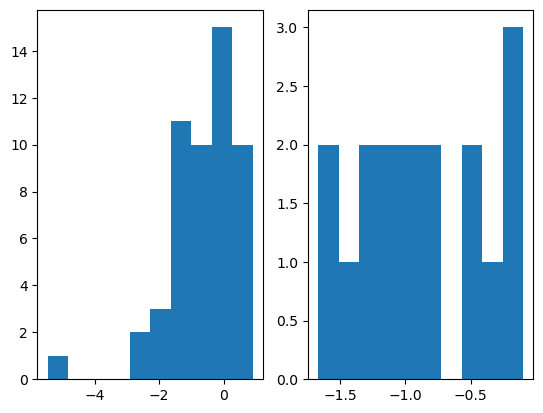

In [36]:
plt.subplot(1,2,1)
plt.hist(df['Left'])
plt.subplot(1,2,2)
plt.hist(stats.boxcox(df['Left'],lmbda=0.5))
plt.show()

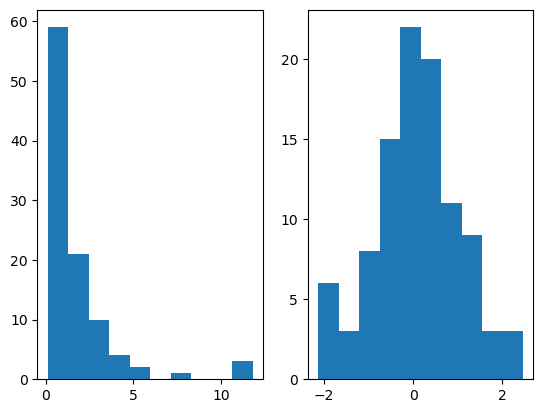

In [37]:
plt.subplot(1,2,1)
plt.hist(df['Right'])
plt.subplot(1,2,2)
plt.hist(stats.boxcox(df['Right'],lmbda=0.0))
plt.show()

In [39]:
skew(df)

array([       nan, 3.07501128])